In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST Dataset

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 64

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 159981650.02it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 91908720.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40483582.68it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17429578.01it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



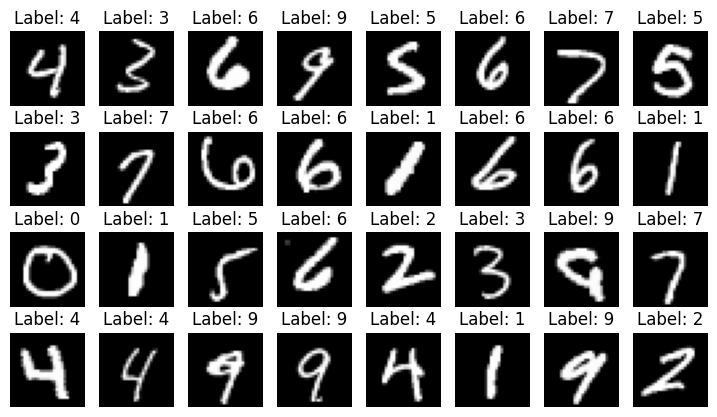

In [3]:
# Visualize MNIST Data

def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(9, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].view(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

    plt.show()

# Visualize a batch of MNIST images
images, labels = next(iter(train_loader))
plot_images(images, labels, nrows=4, ncols=8)

In [5]:
# Design Your Neural Network Model

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = NeuralNet()

In [6]:
# Hyperparameter Setup

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

In [7]:
# Training Loop

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training complete")

Epoch 1/10, Loss: 1.6583801411362344
Epoch 2/10, Loss: 1.549158424456745
Epoch 3/10, Loss: 1.5322355643264267
Epoch 4/10, Loss: 1.5202402026414363
Epoch 5/10, Loss: 1.5128560593641642
Epoch 6/10, Loss: 1.5062637729431265
Epoch 7/10, Loss: 1.5019353649763665
Epoch 8/10, Loss: 1.4983497667414294
Epoch 9/10, Loss: 1.4962511621812769
Epoch 10/10, Loss: 1.4933551387237842
Training complete


In [9]:
# Evaluate the Model

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.962
F1 Score: 0.9618257000403805
Precision: 0.9624890001890284
Recall: 0.962
Confusion Matrix:
[[ 969    0    1    2    1    3    2    1    1    0]
 [   0 1125    1    2    0    1    5    0    1    0]
 [   7    2 1001    6    1    0    6    6    3    0]
 [   1    1    5  985    0    4    0    8    6    0]
 [   1    0    5    0  956    2    8    2    2    6]
 [   5    1    1   15    0  856   10    2    1    1]
 [   6    2    3    2    3    4  936    0    2    0]
 [   1   14   18    2    1    0    2  990    0    0]
 [   4    6    5   22    5    8   10    9  905    0]
 [   4    9    1   15   19   17    2   34   11  897]]


Kesimpulan:

Hasil evaluasi model untuk klasifikasi dataset MNIST adalah sebagai berikut:

1. Accuracy: Akurasi model adalah sekitar 96%, yang berarti model berhasil mengklasifikasikan sebagian besar gambar dengan benar.

2. F1 Score: F1 Score adalah sekitar 0.96. F1 Score adalah metrik yang menggabungkan presisi (precision) dan recall, dan dapat digunakan untuk mengukur performa model pada dataset yang tidak seimbang. Nilai F1 Score yang tinggi menunjukkan keseimbangan yang baik antara presisi dan recall.

3. Precision: Presisi model adalah sekitar 96%. Presisi mengukur berapa persentase dari gambar yang diklasifikasikan sebagai positif oleh model yang sebenarnya adalah positif. Ini menunjukkan bahwa sebagian besar prediksi positif model adalah benar.

4. Recall: Recall model adalah sekitar 96%. Recall mengukur berapa persentase dari gambar yang sebenarnya positif yang berhasil diklasifikasikan sebagai positif oleh model. Ini menunjukkan bahwa model dapat menemukan sebagian besar gambar yang sebenarnya positif.

5. Confusion Matrix: Confusion Matrix memberikan gambaran lebih rinci tentang kinerja model untuk setiap kelas. Matriks ini menunjukkan berapa banyak gambar dari setiap kelas yang diklasifikasikan dengan benar (diagonal utama) dan yang salah diklasifikasikan (selain diagonal utama). Dari matriks ini, kita dapat melihat bahwa model memiliki beberapa kesalahan dalam mengklasifikasikan beberapa gambar, tetapi secara keseluruhan, kinerjanya baik.

Dengan akurasi sekitar 96% dan metrik lainnya yang juga tinggi, model ini terlihat sangat baik dalam mengklasifikasikan digit tulisan tangan dalam dataset MNIST.